Credit: The content of this notebook is adapted from [Python for Machine Learning, 3rd edition](https://www.packtpub.com/product/python-machine-learning-third-edition/9781789955750)

In [51]:
from skimage.io import imread

from skimage.transform import resize

import matplotlib.pyplot as plt

import matplotlib.cm as cm

%matplotlib inline


# Convolutional Neural Networks

## Agenda 

- History and background

- Working with image data.

- Convolution operations in 1D and 2D

- Subsampling

- CNN with Keras

# History and Background
[Handwritten Digit Recognition with a Back-Propagation Network](https://papers.nips.cc/paper/1989/file/53c3bce66e43be4f209556518c2fcb54-Paper.pdf)

<img src = "images/hinton_computer_vision.png" width = 550/>


[G. Hinton initial reaction of research community to NN's. From: on Architects of Intelligence by Martin Ford, p 76](http://book.mfordfuture.com/)

- [2018 Turing Award: LeCun, Hinton, Bengio](https://amturing.acm.org/award_winners/lecun_6017366.cfm)

- [ImageNet Database and Competition](https://en.wikipedia.org/wiki/ImageNet)

<img src = "images/alexnet.png" width = 750/>

[Alexnet Architecture](https://www.cs.toronto.edu/~kriz/imagenet_classification_with_deep_convolutional.pdf)

# Image Data

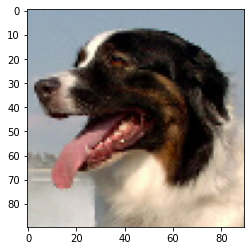

In [57]:
example_file = ("http://upload.wikimedia.org/" + "wikipedia/commons/7/7d/Dog_face.png")

image = imread(example_file, as_gray=False)

plt.imshow(image, cmap=cm.gray)

plt.show()

[Code Source: Dummies.com](https://www.dummies.com/programming/big-data/data-science/working-set-images-machine-learning/)

In [58]:
## RGB data
image.shape

(90, 90, 3)

<center>
<img src = 'images/edge.png' width = 550 />
    <center/>
    
[Source: Deep Learning Book p.329](https://www.deeplearningbook.org/)

__Idea and Motivation Behind CNN__

- An important feature can be anywhere in the input

- Spatial translation shouldn't change predictions

- Nearby pixels are typically more relevant (Sparse Connectivity)

- The same weights are used for different patches of the input images.



<center>
<img src = 'images/sparse.png' width = 550 />
    <center/>

[Source: Goodfellow 2016](https://www.deeplearningbook.org/slides/09_conv.pdf)

# Understanding CNN's

- Basic idea is: Extracting useful features.

[0:00 - 3:15 Introducing CNN's](https://www.youtube.com/watch?v=x_VrgWTKkiM&ab_channel=TensorFlow)

__CNN Architecture Main Components__

- Several Convolutional and subsampling (pooling) layers

- Followed by fully connected layers

<center>
<img src = 'images/feature_map.png' width = 550 />
    <center/>
    
[Python for Machine Learning,p 519]

# Convolutions

(Note that in TF implementation mathematically cross-correlation is used.)


## 1D case

__Notation__

$\boldsymbol{x}$ : input vector

$\boldsymbol{w}$ : weight vector (in CNN context we call them __filter__ or __kernel__)

$\boldsymbol{y} = \boldsymbol{x} \ast \boldsymbol{w}$

$$y[i] = \sum_{k=-\infty}^{k= \infty} \boldsymbol{x}[i-k]\boldsymbol{w}[k]$$

__Padding__

<center>
<img src = 'images/1D_padding.png' width = 550 />
    <center/>
    


__Types of Padding__

- Same: Output vector has the same dimension as the input vector.

- Valid: No Padding.

__Same Padding__
<center>
<img src = 'images/same.jpeg' width = 550 />
    <center/>

__Valid Padding__
<center>
<img src = 'images/valid_padding.jpeg' width = 550 />
    <center/>

__Stride__

number of cells to shift right each time!

__Example__

<center>
<img src = 'images/conv_example.png' width = 550 />
    <center/>
    
[Source: "Python for Machine Learning,p 519]

__Your Turn__

x = [1, 3, 2, 1, 4]

w = [1, 0, 2]


for: 

padding = 'same'

and 

padding = 'valid'

In [59]:
import numpy as np

x = [1, 3, 2, 1, 4]

w = [1, 0, 2]

np.convolve(x, w, mode = 'same')

array([3, 4, 7, 8, 2])

## 2D Convolutions

<center>
<img src = 'images/2D_conv_intro.png' width = 550 />
    <center/>
    

[Example](https://towardsdatascience.com/a-beginners-guide-to-convolutional-neural-networks-cnns-14649dbddce8)

__Zero padded and stride = (2,2)__
<center>
<img src = 'images/2D_conv.png' width = 550 />
    <center/>
    

In [60]:
## Note that this is still slightly different from TF implementation
## Also this is not computationally effective.

import scipy.signal

X = [[1, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]]

W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]

scipy.signal.convolve2d(X, W, mode='same')

array([[11, 25, 32, 13],
       [19, 25, 24, 13],
       [13, 28, 25, 17],
       [11, 17, 14,  9]])

In [61]:
def conv2d(X, W, p=(0, 0), s=(1, 1)):
    W_rot = np.array(W)[::-1,::-1]
    X_orig = np.array(X)
    n1 = X_orig.shape[0] + 2*p[0]
    n2 = X_orig.shape[1] + 2*p[1]
    X_padded = np.zeros(shape=(n1, n2))
    X_padded[p[0]:p[0]+X_orig.shape[0],
    p[1]:p[1]+X_orig.shape[1]] = X_orig

    res = []
    for i in range(0, int((X_padded.shape[0] - 
                           W_rot.shape[0])/s[0])+1, s[0]):
        res.append([])
        for j in range(0, int((X_padded.shape[1] - 
                               W_rot.shape[1])/s[1])+1, s[1]):
            X_sub = X_padded[i:i+W_rot.shape[0],
                             j:j+W_rot.shape[1]]
            res[-1].append(np.sum(X_sub * W_rot))
    return(np.array(res))

X = [[1, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]

print('Conv2d Implementation:\n',
    conv2d(X, W, p=(2, 2), s=(1, 1)))

Conv2d Implementation:
 [[ 1.  3.  5. 13.  6. 12.]
 [ 6. 11. 25. 32. 13. 13.]
 [ 6. 19. 25. 24. 13. 13.]
 [ 4. 13. 28. 25. 17. 11.]
 [ 3. 11. 17. 14.  9.  4.]
 [ 0.  3.  7.  7.  5.  2.]]


# Subsampling Layers

## Pooling Operation

<center>
<img src= 'images/pooling.png' width = 550 />
    <center/>
    

__Why Pooling__

- Local invariance: Small changes in local neighborhood do not change the result.

- Decreases the size of features which means less computation.

- Decreasing the dimensionality of the feature space can prevent over-fitting.

## Putting Different Layers together

<center>
<img src = 'images/putting_together.png' width = 550 />
    <center/>

# CNN with Keras

[TensorFlow Tutorial](https://www.tensorflow.org/tutorials/images/cnn)

# Resources

[cs231 - Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/convolutional-networks/)

[What is padding in a neural network](https://www.machinecurve.com/index.php/2020/02/07/what-is-padding-in-a-neural-network/)

[TF- CNN](https://www.tensorflow.org/tutorials/images/cnn)

[Andrew Ng - CNN Course](https://www.youtube.com/playlist?list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF)